In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.signal import convolve2d
from scipy.ndimage import convolve
from scipy.signal import find_peaks

In [2]:
import imagej
path1 = "C:\\Users\\abril\\Desktop\\Arbeitsprogramme\\fiji-win64\\Fiji.app"
path2 = "C:\\Users\\abril\\Andreas Eigene Dateien\\Programme\\Fiji.app"

ij = imagej.init(path1, mode='interactive')

In [3]:
ij.ui().showUI()

In [40]:
def readImage():
    global img
    img = ij.py.active_xarray() 
    if img is None:
        return
    img = np.array(img)
    if (np.max(img) <= 2**15):
        img = img.astype("int16")
readImage()
if img is not None:
    print(img.shape, img.dtype)
else:
    print("None")

(300, 512, 512) int16


In [53]:
imgDiff = np.diff(img, axis=0)
print(imgDiff.shape)

(299, 512, 512)


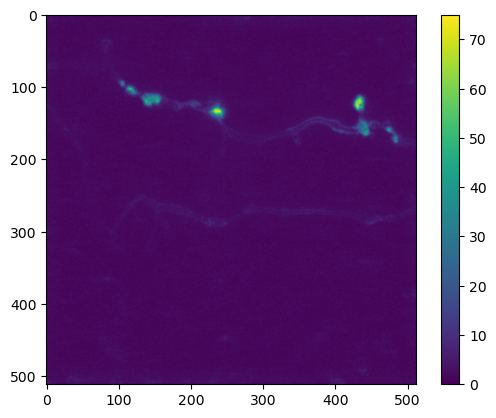

In [54]:
imgDiffMax = np.max(imgDiff,axis=0)
plt.imshow(imgDiffMax)
plt.colorbar()
plt.show()

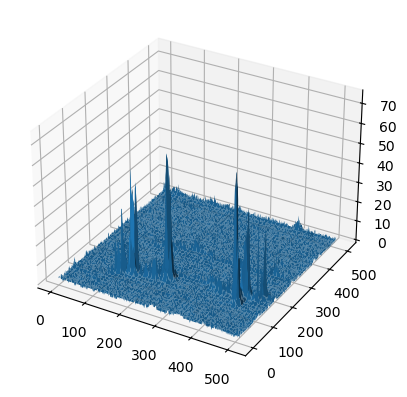

In [55]:
X = np.arange(0, 512)
Y = np.arange(0,512)
X, Y = np.meshgrid(X, Y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X,Y, imgDiffMax)
plt.show()

[-21   0   2  -1  -1   1   0   0   1  -1   0   1   0  -1  -1   1   0   1
  -2   0   0   0   1   0   0  -1   0   0   1  -2   1   3  -3   2  -2   0
   0   1  -1   1   3  -3   0  -1   0   0   0   2  -2   0   0   0  -1   1
   2  -2   1  -2   2   0   0  -1   0   1  -1   1  -1   1  -1   0  -1   1
   1  -1   1   0   0   0  -1   1  -1   1  -2   2   0   0   0  -1  -1   0
   2  -1   0  -1   2  -1   1   1  -2   1   0  50 -46  -4   0   0   0  -2
   1   1  13 -11  -2   0   1   0   0  -1   0  -1  13 -11  -1   0   0  -1
   0   0   2  -3  24 -21   3  -3   7  -9  -1   1   1  -2  11  -7  -1  -1
  -1   2  -2   0   0   0   4   0  -1  -3   1  -1   1   1  -2   0  40 -30
  -8   0  -1   0   0   0   0  -1  28 -24   0  -1  -1  -1   0   0   2   0
  -2   3  -2  -1   0  -1   0   1   3  -3  43 -39  -3  -1   0   3   0  -2
  -1   2  -2  -2   7  -5   1  -2   2   0  -2   1   1  -1  -1   1  -2   1
  -1   1   0   0   0   0   0   0   1  -1   1   2  -3   1   0   0  -1   0
   1  -1   1   0   1  -3   2   3  -3   0   0   0  -

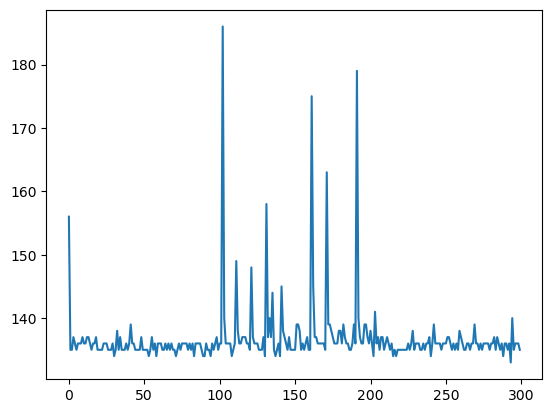

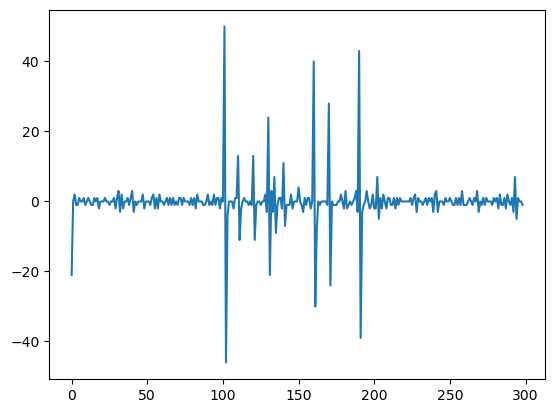

In [21]:
test = img[:,136,232]
diff = np.diff(test)
print(diff)
print(len(diff), len(test))
plt.plot(test)
plt.show()
plt.plot(diff)
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[2 3 3 ... 2 2 1]
 [2 2 4 ... 3 3 2]
 [2 2 2 ... 3 4 3]
 ...
 [5 6 6 ... 2 2 2]
 [5 5 6 ... 2 1 2]
 [4 3 5 ... 1 2 1]]


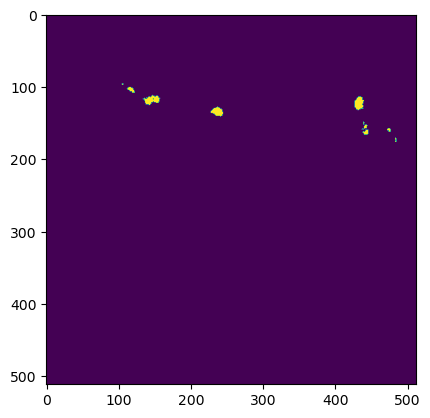

In [108]:
imgTreshold = imgDiffMax > 30
imgTreshold = imgTreshold.astype("int16")
print(imgTreshold)
print(imgDiffMax)
plt.imshow(imgTreshold)
plt.show()

In [109]:
imgTresholdClass = np.empty(imgTreshold.shape) #first y, then x
classIterator = 1
for xy,z in np.ndenumerate(imgTreshold):
    y = xy[0]
    x = xy[1]
    if x > 1 and y > 1 and z > 0:
        if imgTresholdClass[x,y-1]!=0:
            imgTresholdClass[x,y] = imgTresholdClass[x,y-1]
        elif imgTresholdClass[x-1,y]!=0:
            imgTresholdClass[x,y] = imgTresholdClass[x-1,y]
        elif imgTresholdClass[x-1,y-1]!=0:
            imgTresholdClass[x,y] = imgTresholdClass[x-1,y-1]
        elif imgTresholdClass[x+1,y-1]!=0:
            imgTresholdClass[x,y] = imgTresholdClass[x+1,y-1]
        else:
            imgTresholdClass[x,y] = classIterator
            classIterator += 1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


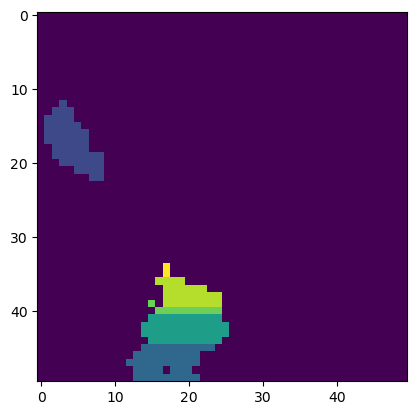

In [110]:
print(imgTresholdClass[100:150,100:150])
plt.imshow(imgTresholdClass[100:150,100:150])

19.0
1


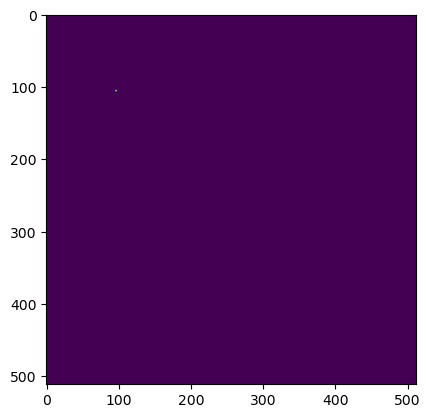

2


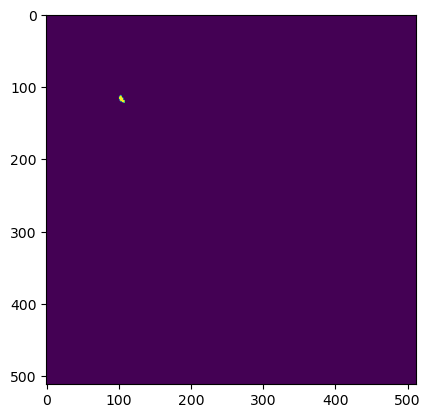

3


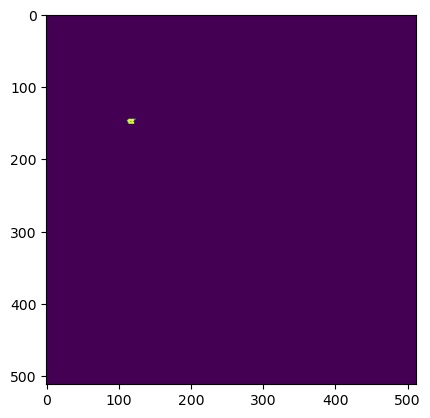

4


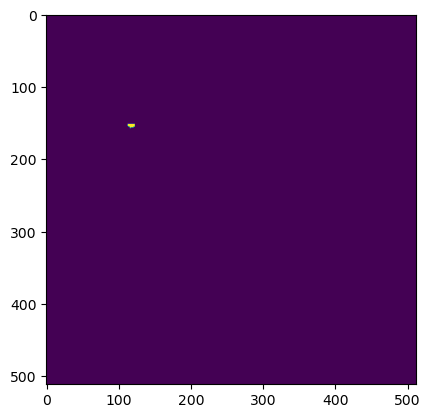

5


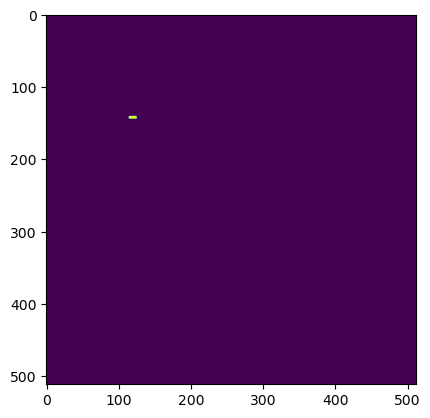

6


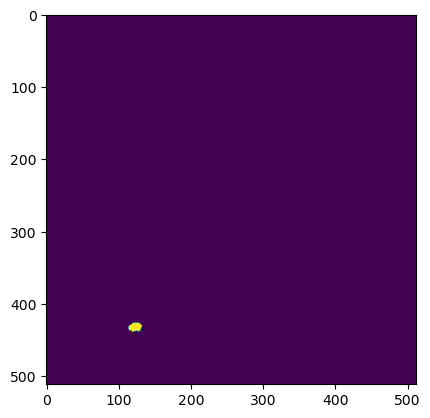

7


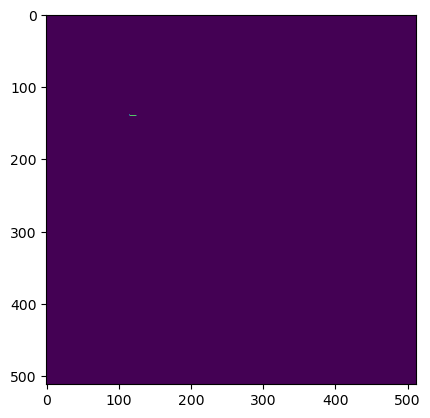

8


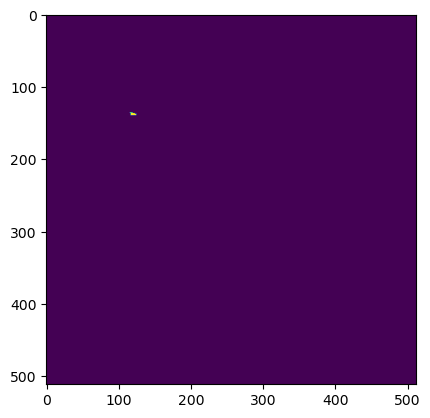

9


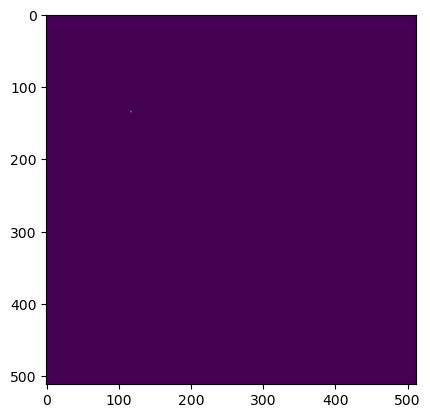

10


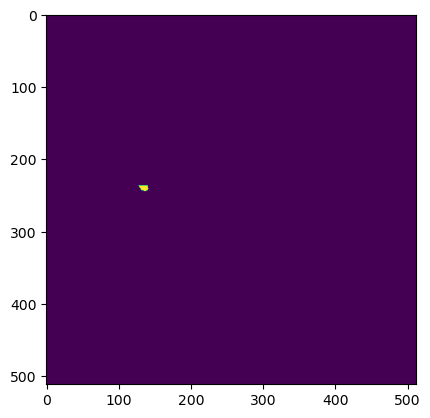

11


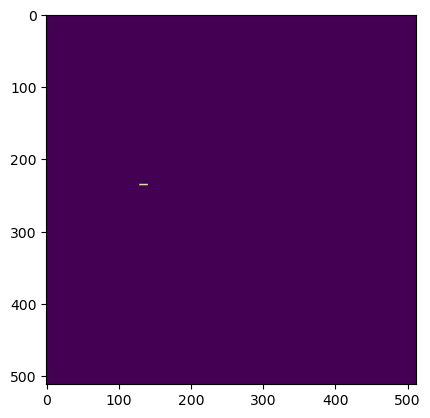

12


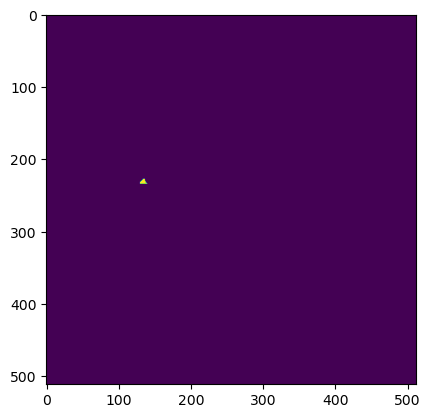

13


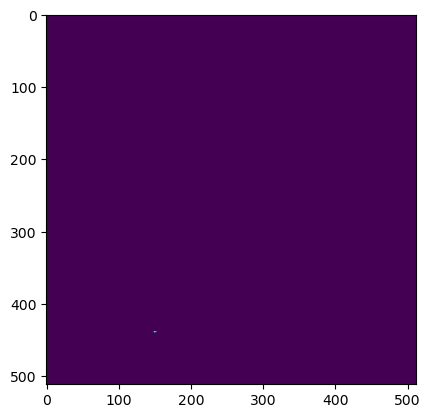

14


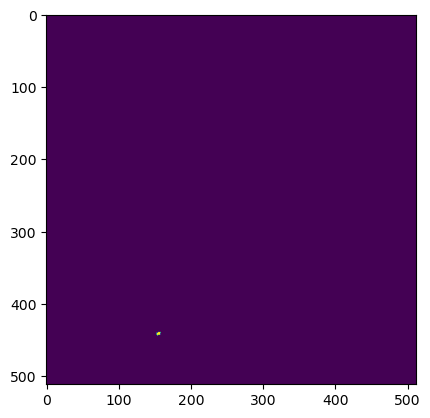

15


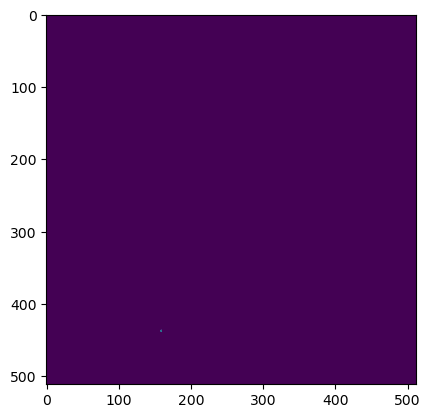

16


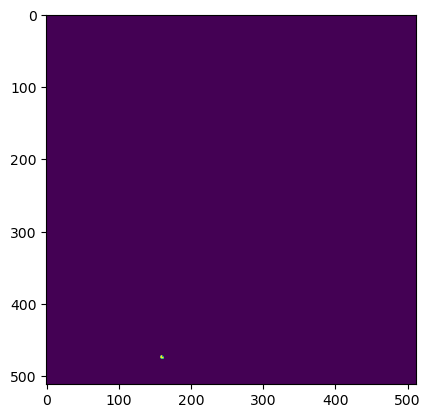

17


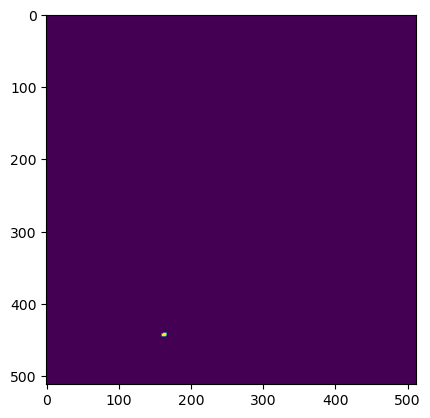

18


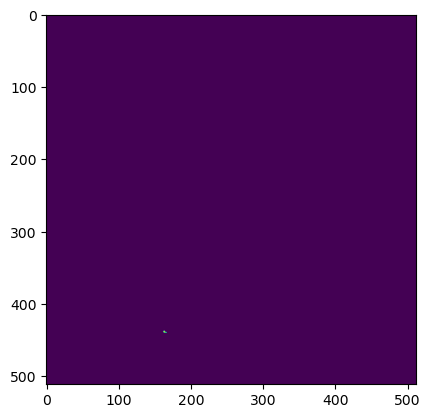

19


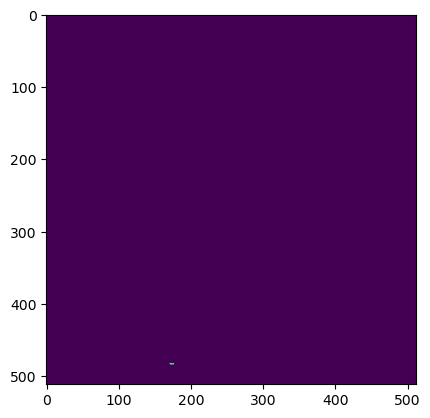

In [107]:
print(np.max(imgTresholdClass))
for i in range(1,int(np.max(imgTresholdClass))+1):
    print(i)
    plt.imshow(imgTresholdClass == i)
    plt.show()